# 1. 머신러닝모델의 평가
- 하이퍼파라미터 : 사용자가 직접 정해줄 수 있는 변수
    : 학습률/ 은닉층의 수, 뉴런의 수, 드롭아웃 비율
- 매개변수 : 기계가 훈련을 통해서 바꾸는 변수
    : 가중치와 편향과 같은 학습을 통해 바뀌어져가는 변수
    
# 2. 분류와 회귀
- 선형 회귀: 회귀 문제에 대해 학습
- 로지스틱 회귀 : 분류 문제를 학습함

    ## 2-1. 이진 분류 문제
    ## 2-2. 다중 클래스 분류
    ## 2-3. 회귀문제

# 3. 지도학습과 비지도학습

   ## 3-1. 지도 학습
   ## 3-2. 비지도 학습
       - LDA, Word2Vec
       
# 4. 샘플과 특성
- 행 : 샘플
- y를 예측하기 위한 각각의 독립 변수(x) --> 특성

# 5. 혼동 행렬 
- 정확도는 맞춘 결과와 틀린 결과에 대한 세부 내용 알려주지 않아 이를 위해 사용하는 것
    ## 5-1. 정밀도
        -양성이라고 대답한 전체 케이스의 TP비율
    ## 5-2. 재현율
        - 양성인 데이터의 전체 개수에 대해 TP의 비율
        - 양성인 데이터 중에서 얼마나 양성인지 예측했는지 나타냄

# 6. 과적합과 과소 적합

# ③ 선형회귀
   ## 1-1. 단순 선형 회귀 분석
       - y = Wx + b
       - y = x
       - W(가중치), b(편향)의 값을 적절히 찾아내면 좋음
   ## 1-2. 다중 선형 회귀 분석
   
# 2. 가설(Hypothesis) 세우기
-  W와 b를 이용하여 식을 세우는 일

# 3. 비용함수(Cost functino) : 평균 제곱 오차(MSE)
- 실제값과 예측값에 대한 오차에 대한 식
- 비용함수, 손실함수
- 예측값의 오차를 줄이는 일에 최적화 된 식이어야 합니다. 

# 4. 옵티마이저 : 경사하강법(Gradient Descent)



# ④ 자동 미분과 선형 회귀 실습
# 1. 자동 미분

In [1]:
import tensorflow as tf

In [2]:
w = tf.Variable(2.)

def f(w):
    y = w**2
    z = 2*y + 5
    return z


In [4]:
with tf.GradientTape() as tape:
    z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [5]:
# 2. 자동미분을 이용한 선형 회귀 구현
# 학습될 가중치 변수를 선언
W = tf.Variable(4.0)
b = tf.Variable(1.0)

In [6]:
@tf.function
def hypothesis(x):
    return W*x + b


In [7]:
# 현재 W =4, b = 1
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [8]:
# 평균 제곱 오차 --> 손실 함수로 정의함
@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred - y))

In [9]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

In [10]:
# 옵티마이저--> 경사 하강법 사용, 학습률은 0.01
optimizer = tf.optimizers.SGD(0.01)

In [13]:
for i in range(301):
    with tf.GradientTape() as tape:
        # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
        y_pred = hypothesis(X)

        # 평균 제곱 오차를 계산
        cost = mse_loss(y_pred, y)

    # 손실 함수에 대한 파라미터의 미분값 계산
    gradients = tape.gradient(cost, [W, b])

    # 파라미터 업데이트
    optimizer.apply_gradients(zip(gradients, [W, b]))
    if i % 10 == 0:
        print("epoch : {:3} | W의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, W.numpy(), b.numpy(), cost))
            

epoch :   0 | W의 값 : 10.6271 | b의 값 : 1.159 | cost : 1.086422
epoch :  10 | W의 값 : 10.6294 | b의 값 : 1.145 | cost : 1.084326
epoch :  20 | W의 값 : 10.6316 | b의 값 : 1.131 | cost : 1.082394
epoch :  30 | W의 값 : 10.6337 | b의 값 : 1.118 | cost : 1.080612
epoch :  40 | W의 값 : 10.6357 | b의 값 : 1.105 | cost : 1.078975
epoch :  50 | W의 값 : 10.6376 | b의 값 : 1.093 | cost : 1.077464
epoch :  60 | W의 값 : 10.6394 | b의 값 : 1.082 | cost : 1.076078
epoch :  70 | W의 값 : 10.6412 | b의 값 : 1.071 | cost : 1.074798
epoch :  80 | W의 값 : 10.6429 | b의 값 :  1.06 | cost : 1.073615
epoch :  90 | W의 값 : 10.6445 | b의 값 :  1.05 | cost : 1.072532
epoch : 100 | W의 값 : 10.6461 | b의 값 :  1.04 | cost : 1.071532
epoch : 110 | W의 값 : 10.6476 | b의 값 :  1.03 | cost : 1.070612
epoch : 120 | W의 값 : 10.6490 | b의 값 : 1.021 | cost : 1.069761
epoch : 130 | W의 값 : 10.6504 | b의 값 : 1.013 | cost : 1.068979
epoch : 140 | W의 값 : 10.6517 | b의 값 : 1.004 | cost : 1.068262
epoch : 150 | W의 값 : 10.6530 | b의 값 : 0.9963 | cost : 1.067602
epoch :

In [14]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.24287  54.243347 59.57684  64.91034 ]


In [15]:
# 케라스로 구현하는 선형 회귀
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [16]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 입력 x의 차원은 1, 출력 y의 차원도 1. 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(X,y, batch_size=1, epochs=300, shuffle=False)

C:\Users\limhanna\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/300
9/9 [==============================] - 1s 3ms/step - loss: 340.7173 - mse: 340.7173
Epoch 2/300
9/9 [==============================] - 0s 3ms/step - loss: 2.2161 - mse: 2.2161
Epoch 3/300
9/9 [==============================] - 0s 4ms/step - loss: 2.2137 - mse: 2.2137
Epoch 4/300
9/9 [==============================] - 0s 3ms/step - loss: 2.2113 - mse: 2.2113
Epoch 5/300
9/9 [==============================] - 0s 2ms/step - loss: 2.2091 - mse: 2.2091
Epoch 6/300
9/9 [==============================] - 0s 3ms/step - loss: 2.2069 - mse: 2.2069
Epoch 7/300
9/9 [==============================] - 0s 3ms/step - loss: 2.2048 - mse: 2.2048
Epoch 8/300
9/9 [==============================] - 0s 3ms/step - loss: 2.2027 - mse: 2.2027
Epoch 9/300
9/9 [==============================] - 0s 2ms/step - loss: 2.2008 - mse: 2.2008
Epoch 10/300
9/9 [==============================] - 0s 3ms/step - loss: 2.1989 - mse: 2.1989
Epoch 11/300
9/9 [==============================] - 0s 3ms/step - loss: 2.1

9/9 [==============================] - 0s 3ms/step - loss: 2.1497 - mse: 2.1497
Epoch 89/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1496 - mse: 2.1496
Epoch 90/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1495 - mse: 2.1495
Epoch 91/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1494 - mse: 2.1494
Epoch 92/300
9/9 [==============================] - 0s 3ms/step - loss: 2.1493 - mse: 2.1493
Epoch 93/300
9/9 [==============================] - 0s 3ms/step - loss: 2.1492 - mse: 2.1492
Epoch 94/300
9/9 [==============================] - 0s 4ms/step - loss: 2.1490 - mse: 2.1490
Epoch 95/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1489 - mse: 2.1489
Epoch 96/300
9/9 [==============================] - 0s 6ms/step - loss: 2.1489 - mse: 2.1489
Epoch 97/300
9/9 [==============================] - 0s 3ms/step - loss: 2.1488 - mse: 2.1488
Epoch 98/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1487 - ms

9/9 [==============================] - 0s 4ms/step - loss: 2.1462 - mse: 2.1462
Epoch 176/300
9/9 [==============================] - ETA: 0s - loss: 2.5244 - mse: 2.524 - 0s 4ms/step - loss: 2.1462 - mse: 2.1462
Epoch 177/300
9/9 [==============================] - 0s 3ms/step - loss: 2.1462 - mse: 2.1462
Epoch 178/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1462 - mse: 2.1462
Epoch 179/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1462 - mse: 2.1462
Epoch 180/300
9/9 [==============================] - 0s 3ms/step - loss: 2.1462 - mse: 2.1462
Epoch 181/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1462 - mse: 2.1462
Epoch 182/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1462 - mse: 2.1462
Epoch 183/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1462 - mse: 2.1462
Epoch 184/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1462 - mse: 2.1462
Epoch 185/300
9/9 [=================

9/9 [==============================] - 0s 3ms/step - loss: 2.1460 - mse: 2.1460
Epoch 262/300
9/9 [==============================] - 0s 3ms/step - loss: 2.1460 - mse: 2.1460
Epoch 263/300
9/9 [==============================] - 0s 3ms/step - loss: 2.1460 - mse: 2.1460
Epoch 264/300
9/9 [==============================] - 0s 5ms/step - loss: 2.1460 - mse: 2.1460
Epoch 265/300
9/9 [==============================] - 0s 3ms/step - loss: 2.1460 - mse: 2.1460
Epoch 266/300
9/9 [==============================] - 0s 3ms/step - loss: 2.1460 - mse: 2.1460
Epoch 267/300
9/9 [==============================] - 0s 3ms/step - loss: 2.1460 - mse: 2.1460
Epoch 268/300
9/9 [==============================] - 0s 3ms/step - loss: 2.1460 - mse: 2.1460
Epoch 269/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1460 - mse: 2.1460
Epoch 270/300
9/9 [==============================] - 0s 6ms/step - loss: 2.1460 - mse: 2.1460
Epoch 271/300
9/9 [==============================] - 0s 3ms/step - loss: 2

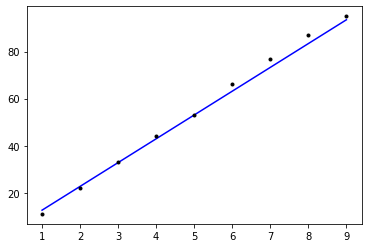

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [18]:
print(model.predict([9.5]))

[[98.556465]]


# ⑤ 로지스틱 회귀
## 1. 이진분류
## 2. 시그모이드 함수

In [19]:
%matplotlib inline
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용

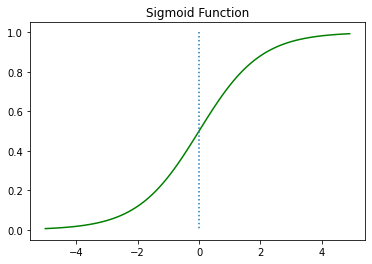

In [20]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

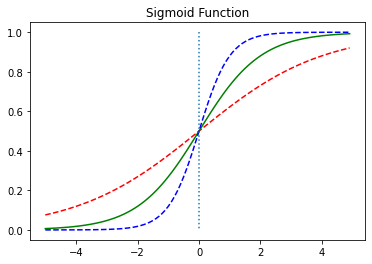

In [23]:
# 가중치가 커질 수록 곡선임
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()


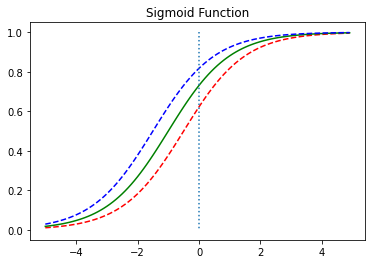

In [24]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

## 3. 비용함수
- 크로스 엔트로피 : 로지스틱 회귀에서 찾아낸 비용 함수
    - 소프트맥스 회귀 비용 함수

In [26]:
# 케라스로 로지스틱 회귀
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [27]:
X = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) #숫자 10부터 1

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

# 옵티마이저는 경사하강법 sgd를 사용합니다.
# 손실 함수(Loss function)는 binary_crossentropy(이진 크로스 엔트로피)를 사용합니다.
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd ,loss='binary_crossentropy', metrics=['binary_accuracy'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.
model.fit(X,y, batch_size=1, epochs=200, shuffle=False)

C:\Users\limhanna\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
13/13 [==============================] - 1s 3ms/step - loss: 0.7053 - binary_accuracy: 0.9231 
Epoch 2/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6843 - binary_accuracy: 0.9231
Epoch 3/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6634 - binary_accuracy: 0.9231
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 0.6425 - binary_accuracy: 0.9231
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6216 - binary_accuracy: 0.9231
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 0.6007 - binary_accuracy: 0.9231
Epoch 7/200
13/13 [==============================] - 0s 3ms/step - loss: 0.5799 - binary_accuracy: 0.9231
Epoch 8/200
13/13 [==============================] - 0s 2ms/step - loss: 0.5590 - binary_accuracy: 0.9231
Epoch 9/200
13/13 [==============================] - 0s 2ms/step - loss: 0.5383 - binary_accuracy: 0.9231
Epoch 10/200
13/13 [=========================

13/13 [==============================] - 0s 2ms/step - loss: 0.1277 - binary_accuracy: 0.9231
Epoch 77/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1271 - binary_accuracy: 0.9231
Epoch 78/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1266 - binary_accuracy: 0.9231
Epoch 79/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1260 - binary_accuracy: 0.9231
Epoch 80/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1255 - binary_accuracy: 0.9231
Epoch 81/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1249 - binary_accuracy: 0.9231
Epoch 82/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1244 - binary_accuracy: 0.9231
Epoch 83/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1239 - binary_accuracy: 0.9231
Epoch 84/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1234 - binary_accuracy: 0.9231
Epoch 85/200
13/13 [==============================

13/13 [==============================] - 0s 2ms/step - loss: 0.0988 - binary_accuracy: 0.9231
Epoch 152/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0985 - binary_accuracy: 0.9231
Epoch 153/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0982 - binary_accuracy: 0.9231
Epoch 154/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0980 - binary_accuracy: 0.9231
Epoch 155/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0977 - binary_accuracy: 0.9231
Epoch 156/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0975 - binary_accuracy: 0.9231
Epoch 157/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0972 - binary_accuracy: 0.9231
Epoch 158/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0969 - binary_accuracy: 0.9231
Epoch 159/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0967 - binary_accuracy: 0.9231
Epoch 160/200
13/13 [=====================

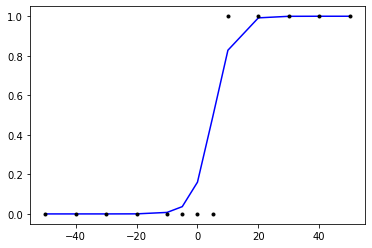

In [28]:
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [29]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[[0.20905387]
 [0.26734105]
 [0.33499646]
 [0.41018766]
 [0.4496838 ]]
[[0.8692325 ]
 [0.99405366]
 [0.9997622 ]
 [0.9999906 ]
 [1.        ]]


# ⑦ 다중 입력에 대한 실습
## 1. 다중 선형 회귀

In [31]:
import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

# 입력 벡터의 차원은 3입니다. 즉, input_dim은 3입니다.
X = np.array([[70,85,11],[71,89,18],[50,80,20],[99,20,10],[50,10,10]]) # 중간, 기말, 가산점

# 출력 벡터의 차원은 1입니다. 즉, output_dim은 1입니다.
y = np.array([73,82,72,57,34]) # 최종 성적

model=Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))

# 학습률(learning rate, lr)은 0.00001로 합니다.
sgd=optimizers.SGD(lr=0.00001)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer = sgd ,loss='mse',metrics=['mse'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 2,000번 시도합니다.
model.fit(X,y, batch_size=1, epochs=2000, shuffle=False)

Epoch 1/2000
5/5 [==============================] - 1s 2ms/step - loss: 6121.5635 - mse: 6121.5635
Epoch 2/2000
5/5 [==============================] - 0s 2ms/step - loss: 896.6883 - mse: 896.6883
Epoch 3/2000
5/5 [==============================] - 0s 2ms/step - loss: 156.1221 - mse: 156.1221
Epoch 4/2000
5/5 [==============================] - 0s 2ms/step - loss: 49.5135 - mse: 49.5135
Epoch 5/2000
5/5 [==============================] - 0s 3ms/step - loss: 32.6340 - mse: 32.6340
Epoch 6/2000
5/5 [==============================] - 0s 3ms/step - loss: 28.5917 - mse: 28.5917
Epoch 7/2000
5/5 [==============================] - 0s 3ms/step - loss: 26.5630 - mse: 26.5630
Epoch 8/2000
5/5 [==============================] - 0s 3ms/step - loss: 25.0322 - mse: 25.0322
Epoch 9/2000
5/5 [==============================] - 0s 3ms/step - loss: 23.7731 - mse: 23.7731
Epoch 10/2000
5/5 [==============================] - 0s 2ms/step - loss: 22.7298 - mse: 22.7298
Epoch 11/2000
5/5 [======================

5/5 [==============================] - 0s 4ms/step - loss: 14.2833 - mse: 14.2833
Epoch 86/2000
5/5 [==============================] - 0s 3ms/step - loss: 14.2311 - mse: 14.2311
Epoch 87/2000
5/5 [==============================] - 0s 8ms/step - loss: 14.1790 - mse: 14.1790
Epoch 88/2000
5/5 [==============================] - 0s 2ms/step - loss: 14.1272 - mse: 14.1272
Epoch 89/2000
5/5 [==============================] - 0s 2ms/step - loss: 14.0755 - mse: 14.0755
Epoch 90/2000
5/5 [==============================] - 0s 3ms/step - loss: 14.0240 - mse: 14.0240
Epoch 91/2000
5/5 [==============================] - 0s 2ms/step - loss: 13.9727 - mse: 13.9727
Epoch 92/2000
5/5 [==============================] - 0s 2ms/step - loss: 13.9215 - mse: 13.9215
Epoch 93/2000
5/5 [==============================] - 0s 2ms/step - loss: 13.8707 - mse: 13.8707
Epoch 94/2000
5/5 [==============================] - 0s 3ms/step - loss: 13.8199 - mse: 13.8199
Epoch 95/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 10.4974 - mse: 10.4974
Epoch 170/2000
5/5 [==============================] - 0s 2ms/step - loss: 10.4591 - mse: 10.4591
Epoch 171/2000
5/5 [==============================] - 0s 3ms/step - loss: 10.4208 - mse: 10.4208
Epoch 172/2000
5/5 [==============================] - 0s 2ms/step - loss: 10.3826 - mse: 10.3826
Epoch 173/2000
5/5 [==============================] - 0s 2ms/step - loss: 10.3447 - mse: 10.3447
Epoch 174/2000
5/5 [==============================] - 0s 2ms/step - loss: 10.3068 - mse: 10.3068
Epoch 175/2000
5/5 [==============================] - 0s 2ms/step - loss: 10.2691 - mse: 10.2691
Epoch 176/2000
5/5 [==============================] - 0s 3ms/step - loss: 10.2315 - mse: 10.2315
Epoch 177/2000
5/5 [==============================] - 0s 3ms/step - loss: 10.1940 - mse: 10.1940
Epoch 178/2000
5/5 [==============================] - 0s 2ms/step - loss: 10.1567 - mse: 10.1567
Epoch 179/2000
5/5 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 7.6873 - mse: 7.6873
Epoch 255/2000
5/5 [==============================] - 0s 2ms/step - loss: 7.6592 - mse: 7.6592
Epoch 256/2000
5/5 [==============================] - 0s 2ms/step - loss: 7.6311 - mse: 7.6311
Epoch 257/2000
5/5 [==============================] - 0s 2ms/step - loss: 7.6032 - mse: 7.6032
Epoch 258/2000
5/5 [==============================] - 0s 2ms/step - loss: 7.5754 - mse: 7.5754
Epoch 259/2000
5/5 [==============================] - 0s 3ms/step - loss: 7.5477 - mse: 7.5477
Epoch 260/2000
5/5 [==============================] - 0s 2ms/step - loss: 7.5201 - mse: 7.5201
Epoch 261/2000
5/5 [==============================] - 0s 2ms/step - loss: 7.4926 - mse: 7.4926
Epoch 262/2000
5/5 [==============================] - 0s 3ms/step - loss: 7.4652 - mse: 7.4652
Epoch 263/2000
5/5 [==============================] - 0s 2ms/step - loss: 7.4379 - mse: 7.4379
Epoch 264/2000
5/5 [==============================] - 0s 2ms/step

5/5 [==============================] - 0s 3ms/step - loss: 5.6508 - mse: 5.6508
Epoch 339/2000
5/5 [==============================] - 0s 2ms/step - loss: 5.6301 - mse: 5.6301
Epoch 340/2000
5/5 [==============================] - 0s 2ms/step - loss: 5.6096 - mse: 5.6096
Epoch 341/2000
5/5 [==============================] - 0s 3ms/step - loss: 5.5891 - mse: 5.5891
Epoch 342/2000
5/5 [==============================] - 0s 3ms/step - loss: 5.5686 - mse: 5.5686
Epoch 343/2000
5/5 [==============================] - 0s 3ms/step - loss: 5.5483 - mse: 5.5483
Epoch 344/2000
5/5 [==============================] - 0s 2ms/step - loss: 5.5279 - mse: 5.5279
Epoch 345/2000
5/5 [==============================] - 0s 3ms/step - loss: 5.5078 - mse: 5.5078
Epoch 346/2000
5/5 [==============================] - 0s 3ms/step - loss: 5.4876 - mse: 5.4876
Epoch 347/2000
5/5 [==============================] - 0s 3ms/step - loss: 5.4675 - mse: 5.4675
Epoch 348/2000
5/5 [==============================] - 0s 2ms/step

Epoch 424/2000
5/5 [==============================] - 0s 3ms/step - loss: 4.1243 - mse: 4.1243
Epoch 425/2000
5/5 [==============================] - 0s 2ms/step - loss: 4.1092 - mse: 4.1092
Epoch 426/2000
5/5 [==============================] - 0s 4ms/step - loss: 4.0942 - mse: 4.0942
Epoch 427/2000
5/5 [==============================] - 0s 2ms/step - loss: 4.0792 - mse: 4.0792
Epoch 428/2000
5/5 [==============================] - 0s 3ms/step - loss: 4.0643 - mse: 4.0643
Epoch 429/2000
5/5 [==============================] - 0s 2ms/step - loss: 4.0495 - mse: 4.0495
Epoch 430/2000
5/5 [==============================] - 0s 2ms/step - loss: 4.0347 - mse: 4.0347
Epoch 431/2000
5/5 [==============================] - 0s 2ms/step - loss: 4.0200 - mse: 4.0200
Epoch 432/2000
5/5 [==============================] - 0s 2ms/step - loss: 4.0053 - mse: 4.0053
Epoch 433/2000
5/5 [==============================] - 0s 3ms/step - loss: 3.9906 - mse: 3.9906
Epoch 434/2000
5/5 [==============================

5/5 [==============================] - 0s 2ms/step - loss: 3.0220 - mse: 3.0220
Epoch 510/2000
5/5 [==============================] - 0s 2ms/step - loss: 3.0110 - mse: 3.0110
Epoch 511/2000
5/5 [==============================] - 0s 2ms/step - loss: 3.0000 - mse: 3.0000
Epoch 512/2000
5/5 [==============================] - 0s 3ms/step - loss: 2.9890 - mse: 2.9890
Epoch 513/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.9781 - mse: 2.9781
Epoch 514/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.9673 - mse: 2.9673
Epoch 515/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.9564 - mse: 2.9564
Epoch 516/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.9457 - mse: 2.9457
Epoch 517/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.9349 - mse: 2.9349
Epoch 518/2000
5/5 [==============================] - 0s 3ms/step - loss: 2.9242 - mse: 2.9242
Epoch 519/2000
5/5 [==============================] - 0s 2ms/step

5/5 [==============================] - 0s 3ms/step - loss: 2.2152 - mse: 2.2152
Epoch 595/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.2071 - mse: 2.2071
Epoch 596/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.1991 - mse: 2.1991
Epoch 597/2000
5/5 [==============================] - 0s 3ms/step - loss: 2.1911 - mse: 2.1911
Epoch 598/2000
5/5 [==============================] - 0s 3ms/step - loss: 2.1831 - mse: 2.1831
Epoch 599/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.1751 - mse: 2.1751
Epoch 600/2000
5/5 [==============================] - 0s 3ms/step - loss: 2.1672 - mse: 2.1672
Epoch 601/2000
5/5 [==============================] - 0s 3ms/step - loss: 2.1593 - mse: 2.1593
Epoch 602/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.1514 - mse: 2.1514
Epoch 603/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.1436 - mse: 2.1436
Epoch 604/2000
5/5 [==============================] - 0s 4ms/step

5/5 [==============================] - 0s 3ms/step - loss: 1.6247 - mse: 1.6247
Epoch 680/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.6188 - mse: 1.6188
Epoch 681/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.6129 - mse: 1.6129
Epoch 682/2000
5/5 [==============================] - 0s 3ms/step - loss: 1.6070 - mse: 1.6070
Epoch 683/2000
5/5 [==============================] - 0s 3ms/step - loss: 1.6012 - mse: 1.6012
Epoch 684/2000
5/5 [==============================] - 0s 6ms/step - loss: 1.5954 - mse: 1.5954
Epoch 685/2000
5/5 [==============================] - 0s 3ms/step - loss: 1.5896 - mse: 1.5896
Epoch 686/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.5838 - mse: 1.5838
Epoch 687/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.5780 - mse: 1.5780
Epoch 688/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.5723 - mse: 1.5723
Epoch 689/2000
5/5 [==============================] - 0s 2ms/step

5/5 [==============================] - 0s 2ms/step - loss: 1.1882 - mse: 1.1882
Epoch 766/2000
5/5 [==============================] - 0s 5ms/step - loss: 1.1839 - mse: 1.1839
Epoch 767/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.1796 - mse: 1.1796
Epoch 768/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.1753 - mse: 1.1753
Epoch 769/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.1710 - mse: 1.1710
Epoch 770/2000
5/5 [==============================] - 0s 3ms/step - loss: 1.1668 - mse: 1.1668
Epoch 771/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.1626 - mse: 1.1626
Epoch 772/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.1584 - mse: 1.1584
Epoch 773/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.1542 - mse: 1.1542
Epoch 774/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.1500 - mse: 1.1500
Epoch 775/2000
5/5 [==============================] - 0s 3ms/step

5/5 [==============================] - 0s 2ms/step - loss: 0.8731 - mse: 0.8731
Epoch 851/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.8699 - mse: 0.8699
Epoch 852/2000
5/5 [==============================] - 0s 4ms/step - loss: 0.8668 - mse: 0.8668
Epoch 853/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.8636 - mse: 0.8636
Epoch 854/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.8605 - mse: 0.8605
Epoch 855/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.8574 - mse: 0.8574
Epoch 856/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.8543 - mse: 0.8543
Epoch 857/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.8512 - mse: 0.8512
Epoch 858/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.8481 - mse: 0.8481
Epoch 859/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.8451 - mse: 0.8451
Epoch 860/2000
5/5 [==============================] - 0s 2ms/step

5/5 [==============================] - 0s 3ms/step - loss: 0.6401 - mse: 0.6401
Epoch 937/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.6378 - mse: 0.6378
Epoch 938/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.6356 - mse: 0.6356
Epoch 939/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.6333 - mse: 0.6333
Epoch 940/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.6310 - mse: 0.6310
Epoch 941/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.6287 - mse: 0.6287
Epoch 942/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.6265 - mse: 0.6265
Epoch 943/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.6242 - mse: 0.6242
Epoch 944/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.6220 - mse: 0.6220
Epoch 945/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.6198 - mse: 0.6198
Epoch 946/2000
5/5 [==============================] - ETA: 0s - l

5/5 [==============================] - 0s 3ms/step - loss: 0.4737 - mse: 0.4737
Epoch 1021/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.4720 - mse: 0.4720
Epoch 1022/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.4704 - mse: 0.4704
Epoch 1023/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.4687 - mse: 0.4687
Epoch 1024/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.4670 - mse: 0.4670
Epoch 1025/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.4654 - mse: 0.4654
Epoch 1026/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.4637 - mse: 0.4637
Epoch 1027/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.4620 - mse: 0.4620
Epoch 1028/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.4604 - mse: 0.4604
Epoch 1029/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.4588 - mse: 0.4588
Epoch 1030/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 0.3503 - mse: 0.3503
Epoch 1106/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.3490 - mse: 0.3490
Epoch 1107/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.3478 - mse: 0.3478
Epoch 1108/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.3466 - mse: 0.3466
Epoch 1109/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.3454 - mse: 0.3454
Epoch 1110/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.3441 - mse: 0.3441
Epoch 1111/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.3429 - mse: 0.3429
Epoch 1112/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.3417 - mse: 0.3417
Epoch 1113/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.3405 - mse: 0.3405
Epoch 1114/2000
5/5 [==============================] - 0s 4ms/step - loss: 0.3393 - mse: 0.3393
Epoch 1115/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 0.2609 - mse: 0.2609
Epoch 1190/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.2600 - mse: 0.2600
Epoch 1191/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2591 - mse: 0.2591
Epoch 1192/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2582 - mse: 0.2582
Epoch 1193/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.2573 - mse: 0.2573
Epoch 1194/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2564 - mse: 0.2564
Epoch 1195/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2555 - mse: 0.2555
Epoch 1196/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2546 - mse: 0.2546
Epoch 1197/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.2537 - mse: 0.2537
Epoch 1198/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.2528 - mse: 0.2528
Epoch 1199/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 0.1953 - mse: 0.1953
Epoch 1274/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1946 - mse: 0.1946
Epoch 1275/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1939 - mse: 0.1939
Epoch 1276/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.1933 - mse: 0.1933
Epoch 1277/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.1926 - mse: 0.1926
Epoch 1278/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1920 - mse: 0.1920
Epoch 1279/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1913 - mse: 0.1913
Epoch 1280/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.1906 - mse: 0.1906
Epoch 1281/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1900 - mse: 0.1900
Epoch 1282/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1894 - mse: 0.1894
Epoch 1283/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 4ms/step - loss: 0.1466 - mse: 0.1466
Epoch 1359/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.1461 - mse: 0.1461
Epoch 1360/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1456 - mse: 0.1456
Epoch 1361/2000
5/5 [==============================] - 0s 4ms/step - loss: 0.1451 - mse: 0.1451
Epoch 1362/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1447 - mse: 0.1447
Epoch 1363/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1442 - mse: 0.1442
Epoch 1364/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1437 - mse: 0.1437
Epoch 1365/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1432 - mse: 0.1432
Epoch 1366/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1427 - mse: 0.1427
Epoch 1367/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1423 - mse: 0.1423
Epoch 1368/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 0.1114 - mse: 0.1114
Epoch 1443/2000
5/5 [==============================] - 0s 4ms/step - loss: 0.1110 - mse: 0.1110
Epoch 1444/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.1107 - mse: 0.1107
Epoch 1445/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1103 - mse: 0.1103
Epoch 1446/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1100 - mse: 0.1100
Epoch 1447/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1096 - mse: 0.1096
Epoch 1448/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1092 - mse: 0.1092
Epoch 1449/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.1089 - mse: 0.1089
Epoch 1450/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1086 - mse: 0.1086
Epoch 1451/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.1082 - mse: 0.1082
Epoch 1452/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 3ms/step - loss: 0.0853 - mse: 0.0853
Epoch 1528/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0850 - mse: 0.0850
Epoch 1529/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0847 - mse: 0.0847
Epoch 1530/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0845 - mse: 0.0845
Epoch 1531/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0842 - mse: 0.0842
Epoch 1532/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0840 - mse: 0.0840
Epoch 1533/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0837 - mse: 0.0837
Epoch 1534/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0835 - mse: 0.0835
Epoch 1535/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0832 - mse: 0.0832
Epoch 1536/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.0830 - mse: 0.0830
Epoch 1537/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 0.0664 - mse: 0.0664
Epoch 1612/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0662 - mse: 0.0662
Epoch 1613/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0660 - mse: 0.0660
Epoch 1614/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0658 - mse: 0.0658
Epoch 1615/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0656 - mse: 0.0656
Epoch 1616/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.0654 - mse: 0.0654
Epoch 1617/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0652 - mse: 0.0652
Epoch 1618/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0651 - mse: 0.0651
Epoch 1619/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0649 - mse: 0.0649
Epoch 1620/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0647 - mse: 0.0647
Epoch 1621/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 0.0524 - mse: 0.0524
Epoch 1697/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0523 - mse: 0.0523
Epoch 1698/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0521 - mse: 0.0521
Epoch 1699/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0520 - mse: 0.0520
Epoch 1700/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.0518 - mse: 0.0518
Epoch 1701/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0517 - mse: 0.0517
Epoch 1702/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0516 - mse: 0.0516
Epoch 1703/2000
5/5 [==============================] - 0s 4ms/step - loss: 0.0514 - mse: 0.0514
Epoch 1704/2000
5/5 [==============================] - 0s 4ms/step - loss: 0.0513 - mse: 0.0513
Epoch 1705/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.0512 - mse: 0.0512
Epoch 1706/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 0.0422 - mse: 0.0422
Epoch 1782/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.0421 - mse: 0.0421
Epoch 1783/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0420 - mse: 0.0420
Epoch 1784/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0419 - mse: 0.0419
Epoch 1785/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0418 - mse: 0.0418
Epoch 1786/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0417 - mse: 0.0417
Epoch 1787/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.0416 - mse: 0.0416
Epoch 1788/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.0415 - mse: 0.0415
Epoch 1789/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.0414 - mse: 0.0414
Epoch 1790/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0413 - mse: 0.0413
Epoch 1791/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 0.0347 - mse: 0.0347
Epoch 1867/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0346 - mse: 0.0346
Epoch 1868/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.0346 - mse: 0.0346
Epoch 1869/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.0345 - mse: 0.0345
Epoch 1870/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.0344 - mse: 0.0344
Epoch 1871/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0343 - mse: 0.0343
Epoch 1872/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0343 - mse: 0.0343
Epoch 1873/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0342 - mse: 0.0342
Epoch 1874/2000
5/5 [==============================] - 0s 5ms/step - loss: 0.0341 - mse: 0.0341
Epoch 1875/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0341 - mse: 0.0341
Epoch 1876/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 0.0293 - mse: 0.0293
Epoch 1952/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0292 - mse: 0.0292
Epoch 1953/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0292 - mse: 0.0292
Epoch 1954/2000
5/5 [==============================] - 0s 4ms/step - loss: 0.0291 - mse: 0.0291
Epoch 1955/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.0291 - mse: 0.0291
Epoch 1956/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0290 - mse: 0.0290
Epoch 1957/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.0290 - mse: 0.0290
Epoch 1958/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0289 - mse: 0.0289
Epoch 1959/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0288 - mse: 0.0288
Epoch 1960/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.0288 - mse: 0.0288
Epoch 1961/2000
5/5 [==============================] - 0

In [32]:
print(model.predict(X))

[[73.089676]
 [81.97668 ]
 [71.97059 ]
 [57.152634]
 [33.70112 ]]


In [33]:
X_test = np.array([[20,99,10],[40,50,20]]) # 각각 58점과 56점을 예측해야 합니다.
print(model.predict(X_test))

[[58.02037 ]
 [55.816204]]


## 2. 다중 로지스틱 회귀

In [34]:
import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

# 입력 벡터의 차원은 2입니다. 즉, input_dim은 2입니다.
X=np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# 출력 벡터의 차원은 1입니다. 즉, output_dim은 1입니다.
y=np.array([0, 1, 1, 1])

model=Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid')) # 이제 입력의 차원은 2입니다.

# sgd는 경사 하강법을 의미.
# 손실 함수(Loss function)는 binary_crossentropy(이진 크로스 엔트로피)를 사용합니다.
model.compile(optimizer='sgd' ,loss='binary_crossentropy',metrics=['binary_accuracy'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 800번 시도합니다.
model.fit(X, y, batch_size=1, epochs=800, shuffle=False)


Epoch 1/800
4/4 [==============================] - 1s 4ms/step - loss: 0.7429 - binary_accuracy: 0.5000
Epoch 2/800
4/4 [==============================] - 0s 4ms/step - loss: 0.7343 - binary_accuracy: 0.2500
Epoch 3/800
4/4 [==============================] - 0s 3ms/step - loss: 0.7260 - binary_accuracy: 0.2500
Epoch 4/800
4/4 [==============================] - 0s 6ms/step - loss: 0.7180 - binary_accuracy: 0.2500
Epoch 5/800
4/4 [==============================] - 0s 3ms/step - loss: 0.7101 - binary_accuracy: 0.2500
Epoch 6/800
4/4 [==============================] - 0s 4ms/step - loss: 0.7025 - binary_accuracy: 0.2500
Epoch 7/800
4/4 [==============================] - 0s 8ms/step - loss: 0.6951 - binary_accuracy: 0.5000
Epoch 8/800
4/4 [==============================] - 0s 3ms/step - loss: 0.6880 - binary_accuracy: 0.5000
Epoch 9/800
4/4 [==============================] - 0s 3ms/step - loss: 0.6810 - binary_accuracy: 0.5000
Epoch 10/800
4/4 [==============================] - 0s 3ms/step 

4/4 [==============================] - 0s 3ms/step - loss: 0.4641 - binary_accuracy: 0.7500
Epoch 79/800
4/4 [==============================] - 0s 4ms/step - loss: 0.4628 - binary_accuracy: 0.7500
Epoch 80/800
4/4 [==============================] - 0s 2ms/step - loss: 0.4615 - binary_accuracy: 0.7500
Epoch 81/800
4/4 [==============================] - 0s 2ms/step - loss: 0.4602 - binary_accuracy: 0.7500
Epoch 82/800
4/4 [==============================] - 0s 2ms/step - loss: 0.4589 - binary_accuracy: 0.7500
Epoch 83/800
4/4 [==============================] - 0s 2ms/step - loss: 0.4576 - binary_accuracy: 0.7500
Epoch 84/800
4/4 [==============================] - 0s 2ms/step - loss: 0.4564 - binary_accuracy: 0.7500
Epoch 85/800
4/4 [==============================] - 0s 3ms/step - loss: 0.4552 - binary_accuracy: 0.7500
Epoch 86/800
4/4 [==============================] - ETA: 0s - loss: 0.9329 - binary_accuracy: 0.0000e+0 - 0s 3ms/step - loss: 0.4539 - binary_accuracy: 0.7500
Epoch 87/800
4

4/4 [==============================] - 0s 2ms/step - loss: 0.3973 - binary_accuracy: 0.7500
Epoch 156/800
4/4 [==============================] - 0s 3ms/step - loss: 0.3967 - binary_accuracy: 0.7500
Epoch 157/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3961 - binary_accuracy: 0.7500
Epoch 158/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3955 - binary_accuracy: 0.7500
Epoch 159/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3949 - binary_accuracy: 0.7500
Epoch 160/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3943 - binary_accuracy: 0.7500
Epoch 161/800
4/4 [==============================] - 0s 3ms/step - loss: 0.3938 - binary_accuracy: 0.7500
Epoch 162/800
4/4 [==============================] - 0s 3ms/step - loss: 0.3932 - binary_accuracy: 0.7500
Epoch 163/800
4/4 [==============================] - 0s 3ms/step - loss: 0.3926 - binary_accuracy: 0.7500
Epoch 164/800
4/4 [==============================] - 0s 6ms/

4/4 [==============================] - 0s 3ms/step - loss: 0.3593 - binary_accuracy: 0.7500
Epoch 232/800
4/4 [==============================] - 0s 4ms/step - loss: 0.3589 - binary_accuracy: 0.7500
Epoch 233/800
4/4 [==============================] - 0s 3ms/step - loss: 0.3585 - binary_accuracy: 0.7500
Epoch 234/800
4/4 [==============================] - 0s 3ms/step - loss: 0.3581 - binary_accuracy: 0.7500
Epoch 235/800
4/4 [==============================] - 0s 3ms/step - loss: 0.3576 - binary_accuracy: 0.7500
Epoch 236/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3572 - binary_accuracy: 0.7500
Epoch 237/800
4/4 [==============================] - 0s 3ms/step - loss: 0.3568 - binary_accuracy: 0.7500
Epoch 238/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3564 - binary_accuracy: 0.7500
Epoch 239/800
4/4 [==============================] - 0s 3ms/step - loss: 0.3559 - binary_accuracy: 0.7500
Epoch 240/800
4/4 [==============================] - 0s 15ms

4/4 [==============================] - 0s 1ms/step - loss: 0.3295 - binary_accuracy: 0.7500
Epoch 309/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3291 - binary_accuracy: 0.7500
Epoch 310/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3287 - binary_accuracy: 0.7500
Epoch 311/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3284 - binary_accuracy: 0.7500
Epoch 312/800
4/4 [==============================] - 0s 3ms/step - loss: 0.3280 - binary_accuracy: 0.7500
Epoch 313/800
4/4 [==============================] - 0s 3ms/step - loss: 0.3277 - binary_accuracy: 0.7500
Epoch 314/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3273 - binary_accuracy: 0.7500
Epoch 315/800
4/4 [==============================] - 0s 4ms/step - loss: 0.3270 - binary_accuracy: 0.7500
Epoch 316/800
4/4 [==============================] - 0s 10ms/step - loss: 0.3266 - binary_accuracy: 0.7500
Epoch 317/800
4/4 [==============================] - 0s 3ms

4/4 [==============================] - 0s 1ms/step - loss: 0.3045 - binary_accuracy: 0.7500
Epoch 385/800
4/4 [==============================] - 0s 3ms/step - loss: 0.3042 - binary_accuracy: 0.7500
Epoch 386/800
4/4 [==============================] - 0s 3ms/step - loss: 0.3039 - binary_accuracy: 0.7500
Epoch 387/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3036 - binary_accuracy: 0.7500
Epoch 388/800
4/4 [==============================] - 0s 4ms/step - loss: 0.3033 - binary_accuracy: 0.7500
Epoch 389/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3030 - binary_accuracy: 0.7500
Epoch 390/800
4/4 [==============================] - 0s 3ms/step - loss: 0.3027 - binary_accuracy: 0.7500
Epoch 391/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3024 - binary_accuracy: 0.7500
Epoch 392/800
4/4 [==============================] - ETA: 0s - loss: 0.7801 - binary_accuracy: 0.0000e+0 - 0s 8ms/step - loss: 0.3021 - binary_accuracy: 0.7500
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.2832 - binary_accuracy: 0.7500
Epoch 460/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2829 - binary_accuracy: 0.7500
Epoch 461/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2827 - binary_accuracy: 0.7500
Epoch 462/800
4/4 [==============================] - 0s 4ms/step - loss: 0.2824 - binary_accuracy: 0.7500
Epoch 463/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2821 - binary_accuracy: 0.7500
Epoch 464/800
4/4 [==============================] - 0s 4ms/step - loss: 0.2819 - binary_accuracy: 0.7500
Epoch 465/800
4/4 [==============================] - 0s 3ms/step - loss: 0.2816 - binary_accuracy: 0.7500
Epoch 466/800
4/4 [==============================] - 0s 4ms/step - loss: 0.2813 - binary_accuracy: 0.7500
Epoch 467/800
4/4 [==============================] - 0s 4ms/step - loss: 0.2811 - binary_accuracy: 0.7500
Epoch 468/800
4/4 [==============================] - 0s 3ms/

4/4 [==============================] - 0s 2ms/step - loss: 0.2639 - binary_accuracy: 1.0000
Epoch 537/800
4/4 [==============================] - 0s 3ms/step - loss: 0.2637 - binary_accuracy: 1.0000
Epoch 538/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2635 - binary_accuracy: 1.0000
Epoch 539/800
4/4 [==============================] - 0s 3ms/step - loss: 0.2632 - binary_accuracy: 1.0000
Epoch 540/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2630 - binary_accuracy: 1.0000
Epoch 541/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2628 - binary_accuracy: 1.0000
Epoch 542/800
4/4 [==============================] - 0s 3ms/step - loss: 0.2625 - binary_accuracy: 1.0000
Epoch 543/800
4/4 [==============================] - 0s 3ms/step - loss: 0.2623 - binary_accuracy: 1.0000
Epoch 544/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2621 - binary_accuracy: 1.0000
Epoch 545/800
4/4 [==============================] - 0s 3ms/

4/4 [==============================] - 0s 2ms/step - loss: 0.2472 - binary_accuracy: 1.0000
Epoch 613/800
4/4 [==============================] - 0s 3ms/step - loss: 0.2470 - binary_accuracy: 1.0000
Epoch 614/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2468 - binary_accuracy: 1.0000
Epoch 615/800
4/4 [==============================] - 0s 3ms/step - loss: 0.2466 - binary_accuracy: 1.0000
Epoch 616/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2463 - binary_accuracy: 1.0000
Epoch 617/800
4/4 [==============================] - 0s 3ms/step - loss: 0.2461 - binary_accuracy: 1.0000
Epoch 618/800
4/4 [==============================] - 0s 3ms/step - loss: 0.2459 - binary_accuracy: 1.0000
Epoch 619/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2457 - binary_accuracy: 1.0000
Epoch 620/800
4/4 [==============================] - 0s 3ms/step - loss: 0.2455 - binary_accuracy: 1.0000
Epoch 621/800
4/4 [==============================] - 0s 2ms/

4/4 [==============================] - 0s 3ms/step - loss: 0.2323 - binary_accuracy: 1.0000
Epoch 689/800
4/4 [==============================] - 0s 3ms/step - loss: 0.2321 - binary_accuracy: 1.0000
Epoch 690/800
4/4 [==============================] - 0s 3ms/step - loss: 0.2319 - binary_accuracy: 1.0000
Epoch 691/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2317 - binary_accuracy: 1.0000
Epoch 692/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2315 - binary_accuracy: 1.0000
Epoch 693/800
4/4 [==============================] - 0s 3ms/step - loss: 0.2313 - binary_accuracy: 1.0000
Epoch 694/800
4/4 [==============================] - 0s 3ms/step - loss: 0.2312 - binary_accuracy: 1.0000
Epoch 695/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2310 - binary_accuracy: 1.0000
Epoch 696/800
4/4 [==============================] - 0s 3ms/step - loss: 0.2308 - binary_accuracy: 1.0000
Epoch 697/800
4/4 [==============================] - 0s 2ms/

4/4 [==============================] - 0s 2ms/step - loss: 0.2188 - binary_accuracy: 1.0000
Epoch 766/800
4/4 [==============================] - 0s 3ms/step - loss: 0.2186 - binary_accuracy: 1.0000
Epoch 767/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2184 - binary_accuracy: 1.0000
Epoch 768/800
4/4 [==============================] - 0s 3ms/step - loss: 0.2183 - binary_accuracy: 1.0000
Epoch 769/800
4/4 [==============================] - 0s 3ms/step - loss: 0.2181 - binary_accuracy: 1.0000
Epoch 770/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2179 - binary_accuracy: 1.0000
Epoch 771/800
4/4 [==============================] - 0s 3ms/step - loss: 0.2178 - binary_accuracy: 1.0000
Epoch 772/800
4/4 [==============================] - 0s 3ms/step - loss: 0.2176 - binary_accuracy: 1.0000
Epoch 773/800
4/4 [==============================] - 0s 3ms/step - loss: 0.2174 - binary_accuracy: 1.0000
Epoch 774/800
4/4 [==============================] - 0s 8ms/

In [37]:
X=np.array([[1, 0], [1, 1], [0, 0], [0, 1]])
print(model.predict(X))

[[0.8515898 ]
 [0.9815907 ]
 [0.40996855]
 [0.86589015]]


# ⑧ 벡터와 행렬 연산
## 1. 벡터와 행렬과 텐서
## 2. 텐서
### 2-1. 0차원 텐서

In [38]:
d=np.array(5)
print(d.ndim) # 차원수 출력
print(d.shape) # 텐서의 크기 출력 

0
()


### 2-2. 1차원 텐서

In [39]:
# 벡터의 차원 = 축의 개수
d=np.array([1, 2, 3, 4])
print(d.ndim)
print(d.shape)

1
(4,)


### 2-3. 2차원 텐서

In [40]:
d=np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(d.ndim)
print(d.shape)

2
(3, 4)


# ⑨. 소프트맥스 회귀 - 다중 클래스 분류
## 1. 소프트맥스 함수(Softmax function)
- 만약 하나의 샘플 데이터에 대한 예측값으로 모든 가능한 정답지에 대해서 정답일 확률의 합이 1이 되도록 하는거
## 2. 원-핫 벡터의 무작위성
## 3. 비용함수
## 4. 소프트맥스 회귀

In [43]:
import pandas as pd
data = pd.read_csv('iris.csv',encoding='latin1')

In [44]:
print(len(data)) # 총 샘플의 개수 출력
print(data[:5]) # 샘플 중 5개 출

150
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [45]:
print("품종 종류:", data["Species"].unique(), sep="\n")
# 중복을 허용하지 않고, 있는 데이터의 모든 종류를 출력

품종 종류:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


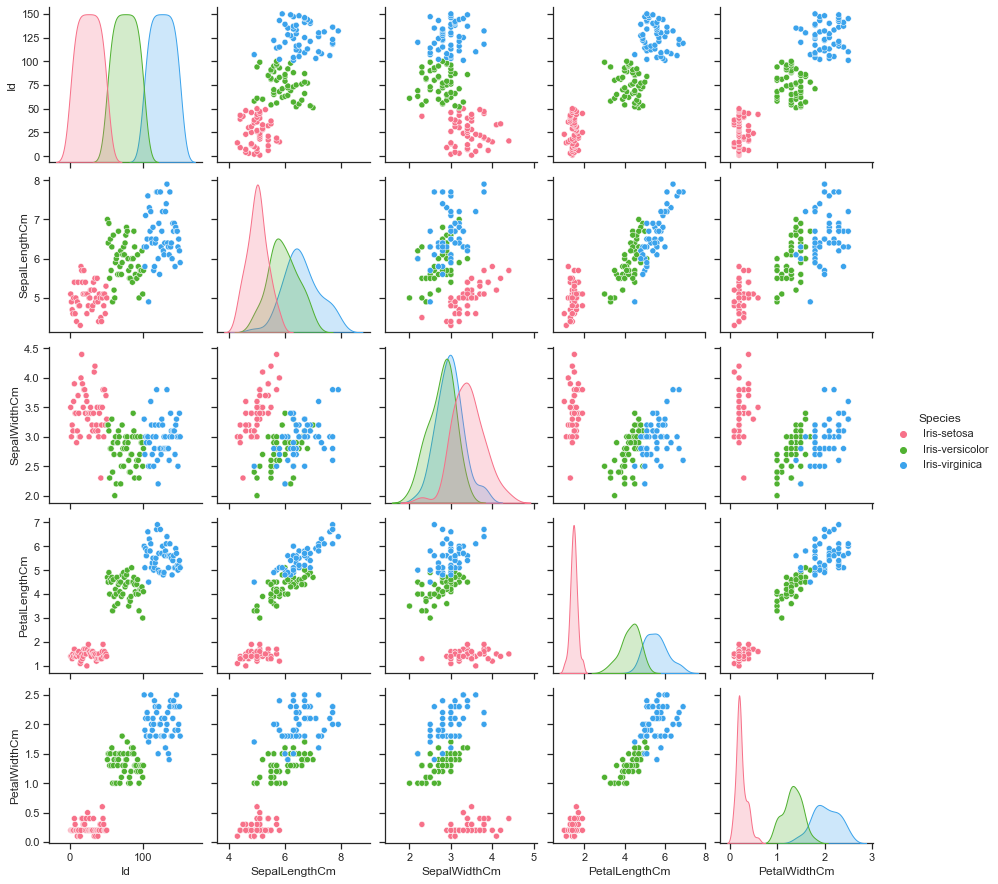

In [46]:
#산점도 그림
import seaborn as sns
#del data['Id'] # 인덱스 열 삭제
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="Species", palette="husl")

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

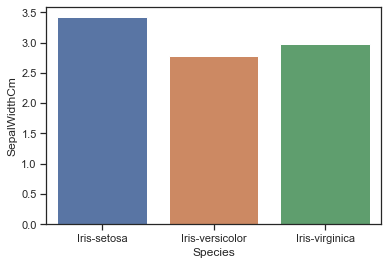

In [47]:
sns.barplot(data['Species'], data['SepalWidthCm'], ci=None)
# 각 종과 특성에 대한 연관 관계

<AxesSubplot:>

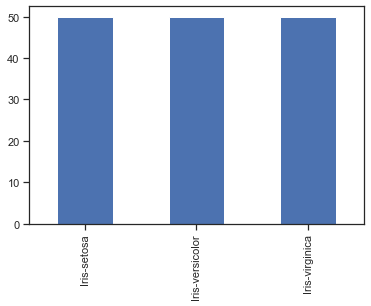

In [48]:
#50개씩 있다
import matplotlib.pyplot as plt
data['Species'].value_counts().plot(kind='bar')

<AxesSubplot:>

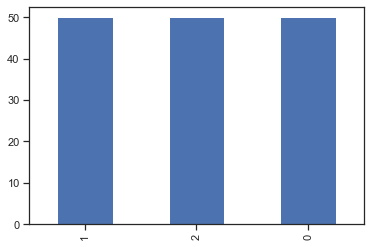

In [49]:
data['Species'] = data['Species'].replace(['Iris-virginica','Iris-setosa','Iris-versicolor'],[0,1,2])
# Iris-virginica는 0, Iris-setosa는 1, Iris-versicolor는 2가 됨.
data['Species'].value_counts().plot(kind='bar')

In [50]:
from sklearn.model_selection import train_test_split
data_X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values # X 데이터에 해당됩니다. X는 총 4개입니다.
data_y = data['Species'].values # Y 데이터에 해당됩니다. 예측해야하는 값입니다.

print(data_X[:5]) #X에 해당되는 데이터를 10개만 출력합니다.
print(data_y[:5]) #y에 해당되는 데이터를 10개만 출력합니다.

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


In [51]:
#원-핫 인코딩
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)
# 훈련 데이터와 테스트 데이터를 8:2로 나눕니다. 또한 데이터의 순서를 섞습니다.
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# 훈련 데이터와 테스트 데이터에 대해서 원-핫 인코딩
print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [52]:
# 소프트맥스 회귀
# 입력차원 - 4, 출력 차원 - 3
# 다차원은 categorical_crossentropy
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

model=Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
sgd=optimizers.SGD(lr=0.01)
# 학습률(learning rate, lr)은 0.01로 합니다.

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# 옵티마이저는 경사하강법의 일종인 adam을 사용합니다.
# 손실 함수(Loss function)는 크로스 엔트로피 함수를 사용합니다.
history=model.fit(X_train,y_train, batch_size=1, epochs=200, validation_data=(X_test, y_test))
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.

C:\Users\limhanna\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
120/120 [==============================] - 1s 2ms/step - loss: 3.1034 - accuracy: 0.4083 - val_loss: 3.5441 - val_accuracy: 0.5333
Epoch 2/200
120/120 [==============================] - 0s 960us/step - loss: 2.4717 - accuracy: 0.6917 - val_loss: 2.9017 - val_accuracy: 0.5667
Epoch 3/200
120/120 [==============================] - 0s 838us/step - loss: 2.0125 - accuracy: 0.6917 - val_loss: 2.3491 - val_accuracy: 0.5667
Epoch 4/200
120/120 [==============================] - 0s 1ms/step - loss: 1.6376 - accuracy: 0.6750 - val_loss: 1.8549 - val_accuracy: 0.4000
Epoch 5/200
120/120 [==============================] - 0s 855us/step - loss: 1.3619 - accuracy: 0.5500 - val_loss: 1.5359 - val_accuracy: 0.2000
Epoch 6/200
120/120 [==============================] - 0s 821us/step - loss: 1.1930 - accuracy: 0.4333 - val_loss: 1.3536 - val_accuracy: 0.2000
Epoch 7/200
120/120 [==============================] - 0s 863us/step - loss: 1.0997 - accuracy: 0.4083 - val_loss: 1.2404 - val_accura

120/120 [==============================] - 0s 830us/step - loss: 0.4138 - accuracy: 0.8333 - val_loss: 0.4062 - val_accuracy: 0.9000
Epoch 58/200
120/120 [==============================] - 0s 897us/step - loss: 0.4101 - accuracy: 0.8833 - val_loss: 0.3970 - val_accuracy: 0.9000
Epoch 59/200
120/120 [==============================] - 0s 922us/step - loss: 0.4056 - accuracy: 0.8750 - val_loss: 0.4090 - val_accuracy: 0.8333
Epoch 60/200
120/120 [==============================] - 0s 989us/step - loss: 0.4026 - accuracy: 0.8667 - val_loss: 0.4000 - val_accuracy: 0.9000
Epoch 61/200
120/120 [==============================] - 0s 1ms/step - loss: 0.3979 - accuracy: 0.8667 - val_loss: 0.3912 - val_accuracy: 0.9000
Epoch 62/200
120/120 [==============================] - 0s 1ms/step - loss: 0.3951 - accuracy: 0.8917 - val_loss: 0.3885 - val_accuracy: 0.9000
Epoch 63/200
120/120 [==============================] - 0s 1ms/step - loss: 0.3903 - accuracy: 0.8833 - val_loss: 0.3862 - val_accuracy: 0.90

120/120 [==============================] - 0s 945us/step - loss: 0.2638 - accuracy: 0.9667 - val_loss: 0.2636 - val_accuracy: 1.0000
Epoch 114/200
120/120 [==============================] - 0s 905us/step - loss: 0.2625 - accuracy: 0.9667 - val_loss: 0.2618 - val_accuracy: 1.0000
Epoch 115/200
120/120 [==============================] - 0s 754us/step - loss: 0.2616 - accuracy: 0.9667 - val_loss: 0.2664 - val_accuracy: 0.9667
Epoch 116/200
120/120 [==============================] - 0s 880us/step - loss: 0.2568 - accuracy: 0.9667 - val_loss: 0.2681 - val_accuracy: 0.9667
Epoch 117/200
120/120 [==============================] - 0s 805us/step - loss: 0.2570 - accuracy: 0.9750 - val_loss: 0.2638 - val_accuracy: 0.9667
Epoch 118/200
120/120 [==============================] - 0s 972us/step - loss: 0.2548 - accuracy: 0.9667 - val_loss: 0.2651 - val_accuracy: 0.9667
Epoch 119/200
120/120 [==============================] - 0s 827us/step - loss: 0.2536 - accuracy: 0.9667 - val_loss: 0.2643 - val_ac

Epoch 169/200
120/120 [==============================] - 0s 796us/step - loss: 0.1916 - accuracy: 0.9750 - val_loss: 0.2003 - val_accuracy: 1.0000
Epoch 170/200
120/120 [==============================] - 0s 838us/step - loss: 0.1887 - accuracy: 0.9667 - val_loss: 0.2042 - val_accuracy: 1.0000
Epoch 171/200
120/120 [==============================] - 0s 746us/step - loss: 0.1885 - accuracy: 0.9750 - val_loss: 0.2036 - val_accuracy: 1.0000
Epoch 172/200
120/120 [==============================] - 0s 869us/step - loss: 0.1869 - accuracy: 0.9667 - val_loss: 0.1971 - val_accuracy: 1.0000
Epoch 173/200
120/120 [==============================] - 0s 831us/step - loss: 0.1864 - accuracy: 0.9667 - val_loss: 0.1991 - val_accuracy: 1.0000
Epoch 174/200
120/120 [==============================] - 0s 830us/step - loss: 0.1842 - accuracy: 0.9667 - val_loss: 0.1983 - val_accuracy: 1.0000
Epoch 175/200
120/120 [==============================] - 0s 888us/step - loss: 0.1851 - accuracy: 0.9750 - val_loss: 0

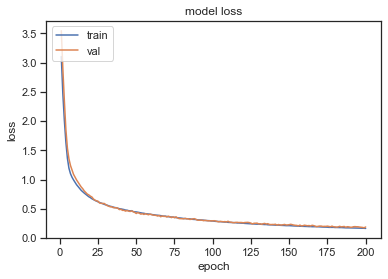

In [53]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [54]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

1/1 [==============================] - 0s 148ms/step - loss: 0.1884 - accuracy: 0.9667

 테스트 정확도: 0.9667
